In [38]:
!pip install torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip install numpy==1.17
!pip install PyYAML==5.3.1
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

Defaulting to user installation because normal site-packages is not writeable
Looking in links: https://download.pytorch.org/whl/torch_stable.html
You should consider upgrading via the '/usr/bin/python3.8 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.17.0.zip (6.5 MB)
  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3.8 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-e4mnur8x/numpy/setup.py'"'"'; __file__='"'"'/tmp/pip-install-e4mnur8x/numpy/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-mst1fda9
       cwd: /tmp/pip-install-e4mnur8x/numpy/
  Complete output (342 lines):
  Running from numpy source directory.
  blas_opt_info:
  blas_mkl_info:
  customize UnixCCompiler
    libraries m

In [39]:
!pip install seaborn

^C
Traceback (most recent call last):
  File "/home/renan/.local/bin/pip", line 7, in <module>
    from pip._internal.cli.main import main
  File "/home/renan/.local/lib/python3.8/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/home/renan/.local/lib/python3.8/site-packages/pip/_internal/cli/autocompletion.py", line 9, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/home/renan/.local/lib/python3.8/site-packages/pip/_internal/cli/main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "/home/renan/.local/lib/python3.8/site-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.progress_bars import BAR_TYPES
  File "/home/renan/.local/lib/python3.8/site-packages/pip/_internal/cli/progress_bars.py", line 12, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/home/renan/.

In [1]:
import json
from PIL import Image
import requests
from io import BytesIO
import cv2

from pathlib import Path
from tqdm import tqdm
import numpy as np
import json
import urllib
import PIL.Image as Image
import cv2
import torch
import torchvision
from IPython.display import display
from sklearn.model_selection import train_test_split

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 16, 10

np.random.seed(42)

In [6]:
pwd = !pwd
pwd = pwd[0]
pwd

'/home/renan/Documentos/trabalho-final-am'

In [7]:
category = []
imgs = []
imgs_index = 1
category_index = 1
annotations_id = 1

newObj = []

with open(f'{pwd}/export-2021-10-26T13-14-04.401Z.json', 'r') as _json:
    
    j = json.load(_json)
    # print(j[0])
    for i in j:
            
        if i['Label']:
            im = cv2.imread(f"{pwd}/data/data/{i['ID']}.png")
            h,w,c = im.shape
            
            annotation = []
            for obj in i['Label']['objects']:

                if obj['title'] not in category:
                        category.append(obj['title'])
                        category_index+=1

                x, y, w_, h_ = obj['bbox'].values()

                annotation.append({
                    'imageHeight': h_,
                    'imageWidth': w_,
                    'label': [
                        obj['title']
                    ],
                    'notes': '',
                    'points': [
                        {
                            'x': x,
                            'y': y
                        },
                        {
                            'x': x + w_, 
                            'y': y + h_
                        }
                    ]
                })

                newObj.append({
                    'annotation': annotation,
                    'content': f"{i['ID']}.png",
                    'extras': 'None'
                })

                annotations_id+=1

            
            

In [8]:
newObj

[{'annotation': [{'imageHeight': 95,
    'imageWidth': 29,
    'label': ['Title1'],
    'notes': '',
    'points': [{'x': 114, 'y': 273}, {'x': 143, 'y': 368}]},
   {'imageHeight': 514,
    'imageWidth': 38,
    'label': ['Title2'],
    'notes': '',
    'points': [{'x': 156, 'y': 63}, {'x': 194, 'y': 577}]},
   {'imageHeight': 516,
    'imageWidth': 42,
    'label': ['Title2'],
    'notes': '',
    'points': [{'x': 425, 'y': 62}, {'x': 467, 'y': 578}]},
   {'imageHeight': 516,
    'imageWidth': 42,
    'label': ['Title2'],
    'notes': '',
    'points': [{'x': 1008, 'y': 62}, {'x': 1050, 'y': 578}]},
   {'imageHeight': 518,
    'imageWidth': 40,
    'label': ['Title2'],
    'notes': '',
    'points': [{'x': 215, 'y': 620}, {'x': 255, 'y': 1138}]},
   {'imageHeight': 381,
    'imageWidth': 33,
    'label': ['Title3'],
    'notes': '',
    'points': [{'x': 204, 'y': 131}, {'x': 237, 'y': 512}]},
   {'imageHeight': 338,
    'imageWidth': 23,
    'label': ['Title3'],
    'notes': '',
    '

In [ ]:
for c in newObj:
  if len(c['annotation']) > 1:
    display(c)

In [10]:
categories = []
for c in newObj:
  for a in c['annotation']:
    categories.extend(a['label'])
categories = list(set(categories))
categories.sort()
categories

['Footer',
 'Header',
 'NonText',
 'Signature',
 'Text',
 'Title1',
 'Title2',
 'Title3',
 'Title4']

In [11]:
train_paper, val_paper = train_test_split(newObj, test_size=0.1)
len(train_paper), len(val_paper)

(676, 76)

In [12]:
row = train_paper[9]
row['content']

'ckugzgcjg3o5p0y6dgp3907uf.png'

In [13]:
i = cv2.imread(f'{pwd}/data/data/{row["content"]}')
img = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
img.shape

(1692, 1200, 3)

In [20]:
for a in row['annotation']:
  for label in a['label']:

    w = a['imageWidth']
    h = a['imageHeight']

    points = a['points']
    p1, p2 = points

    x1, y1 = p1['x'] * w, p1['y'] * h
    x2, y2 = p2['x'] * w, p2['y'] * h

    cv2.rectangle(
      img,
      (int(x1), int(y1)),
      (int(x2), int(y2)),
      color=(0, 255, 0),
      thickness=2
    )

    ((label_width, label_height), _) = cv2.getTextSize(
        label, 
        fontFace=cv2.FONT_HERSHEY_PLAIN,
        fontScale=1.75, 
        thickness=2
    )

    cv2.rectangle(
      img,
      (int(x1), int(y1)),
      (int(x1 + label_width + label_width * 0.05), int(y1 + label_height + label_height * 0.25)),
      color=(0, 255, 0),
      thickness=cv2.FILLED
    )

    cv2.putText(
      img,
      label,
      org=(int(x1), int(y1 + label_height + label_height * 0.25)), # bottom left
      fontFace=cv2.FONT_HERSHEY_PLAIN,
      fontScale=1.75,
      color=(255, 255, 255),
      thickness=2
    )

In [18]:
row['annotation']

[{'imageHeight': 516,
  'imageWidth': 78,
  'label': ['Title2'],
  'notes': '',
  'points': [{'x': 1366, 'y': 65}, {'x': 1444, 'y': 581}]},
 {'imageHeight': 516,
  'imageWidth': 81,
  'label': ['Title2'],
  'notes': '',
  'points': [{'x': 273, 'y': 623}, {'x': 354, 'y': 1139}]},
 {'imageHeight': 403,
  'imageWidth': 51,
  'label': ['Title3'],
  'notes': '',
  'points': [{'x': 1457, 'y': 121}, {'x': 1508, 'y': 524}]},
 {'imageHeight': 372,
  'imageWidth': 22,
  'label': ['Title3'],
  'notes': '',
  'points': [{'x': 370, 'y': 692}, {'x': 392, 'y': 1064}]},
 {'imageHeight': 248,
  'imageWidth': 22,
  'label': ['Title4'],
  'notes': '',
  'points': [{'x': 339, 'y': 196}, {'x': 361, 'y': 444}]},
 {'imageHeight': 76,
  'imageWidth': 18,
  'label': ['Title4'],
  'notes': '',
  'points': [{'x': 802, 'y': 284}, {'x': 820, 'y': 360}]},
 {'imageHeight': 326,
  'imageWidth': 20,
  'label': ['Title4'],
  'notes': '',
  'points': [{'x': 1510, 'y': 158}, {'x': 1530, 'y': 484}]},
 {'imageHeight': 402,

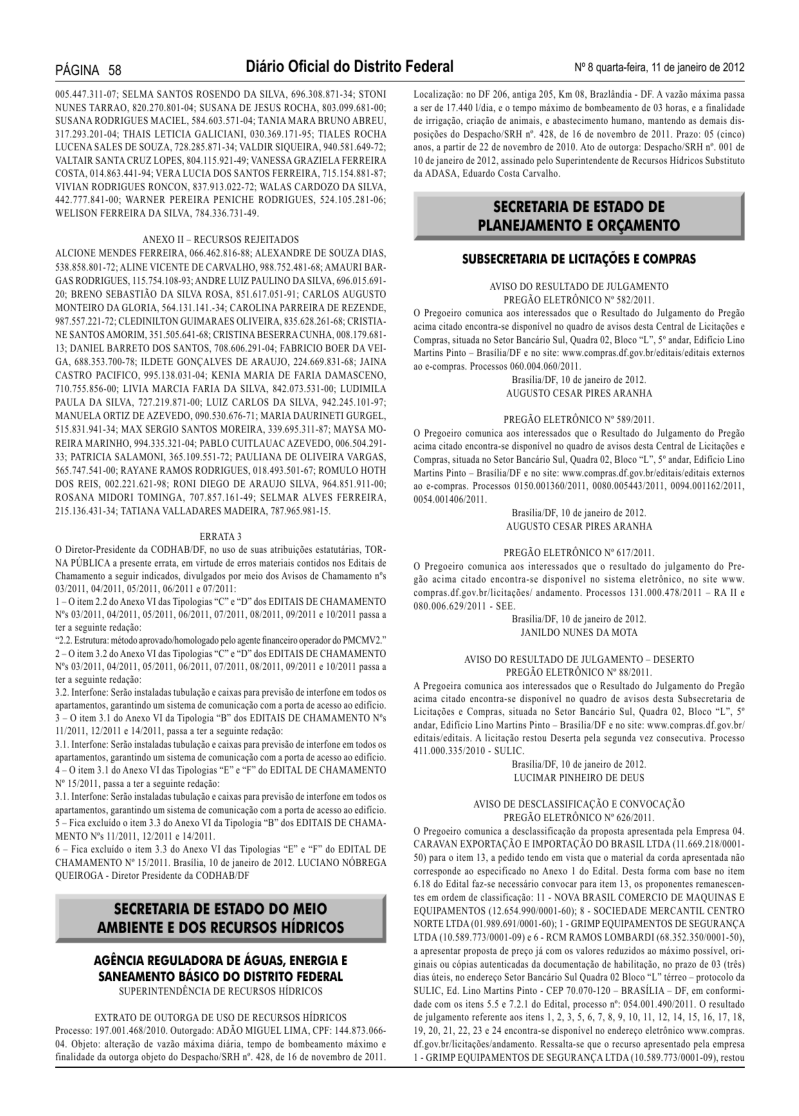

In [21]:
plt.imshow(img)
plt.axis('off');